## Nama : M. Arvin Saskoro
## NIM : 2109106048
## Kelas : Informatika A2 21

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

In [25]:
warnings.filterwarnings('ignore')

### Import Dataset

In [26]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,NaN,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [27]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [28]:
df.corr(numeric_only = True)

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109790,0.064158,-0.051831
PhysicalHealth,0.109790,1.000000,0.287987,-0.061387
MentalHealth,0.064158,0.287987,1.000000,-0.119717
SleepTime,-0.051831,-0.061387,-0.119717,1.000000


## Mneghapus Data Bernilai NULL

In [29]:
df.isna().sum()

HeartDisease         0
BMI                 10
Smoking              0
AlcoholDrinking      0
Stroke               0
PhysicalHealth       0
MentalHealth         0
DiffWalking          0
Sex                  0
AgeCategory          0
Race                 0
Diabetic             0
PhysicalActivity     0
GenHealth            0
SleepTime            0
Asthma               0
KidneyDisease        0
SkinCancer           0
dtype: int64

In [30]:
df = df.dropna()
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### Scaling Data

In [31]:
from sklearn.preprocessing import StandardScaler

df_subset = df[['BMI', 'SleepTime']]

ss = StandardScaler()

x_scaled = ss.fit_transform(df_subset)

### K-Means

In [32]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters = 3, random_state = 0)

model_kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [33]:
labels = model_kmeans.labels_
print(labels)

[0 1 0 ... 0 1 2]


## Evaluasi KMeans dengan Cross Tab

In [34]:
df_kmeans = pd.DataFrame({'labels':labels, 'GenHealth':df.GenHealth})

ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['GenHealth'])

print(ct1)

GenHealth  Excellent   Fair   Good  Poor  Very good
labels                                             
0              34653  13766  39761  4667      56542
1              26131   9973  28801  3432      38177
2               6057  10936  24565  3190      19134


### Menampilkan Centroid Cluster

In [35]:
import matplotlib.pyplot as plt

xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

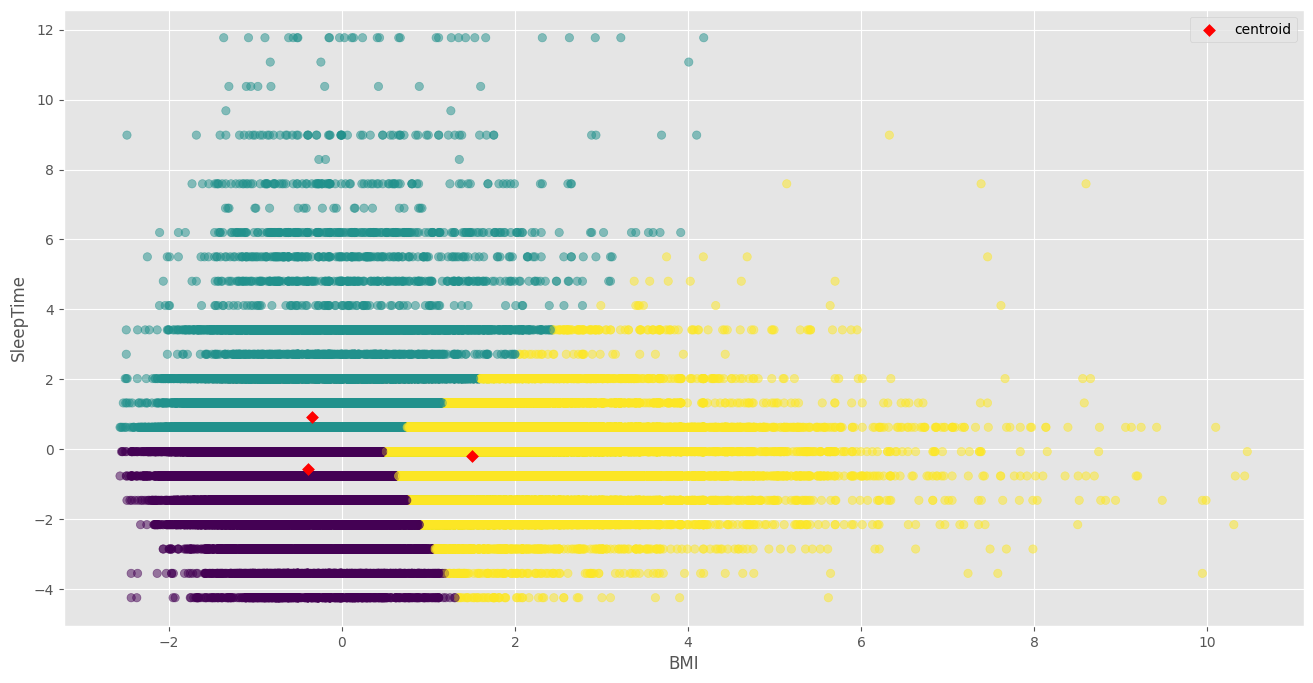

In [36]:
plt.style.use('ggplot') #buat background kotak"
plt.figure(figsize=(16, 8))
plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, c = 'red', marker = 'D', label = 'centroid')
plt.xlabel('BMI')
plt.ylabel('SleepTime')
plt.legend()
plt.show()

In [37]:
df_subset2 = df[['PhysicalHealth', 'MentalHealth']]

ss = StandardScaler()

x_scaled = ss.fit_transform(df_subset2)

In [38]:
import matplotlib.pyplot as plt

xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

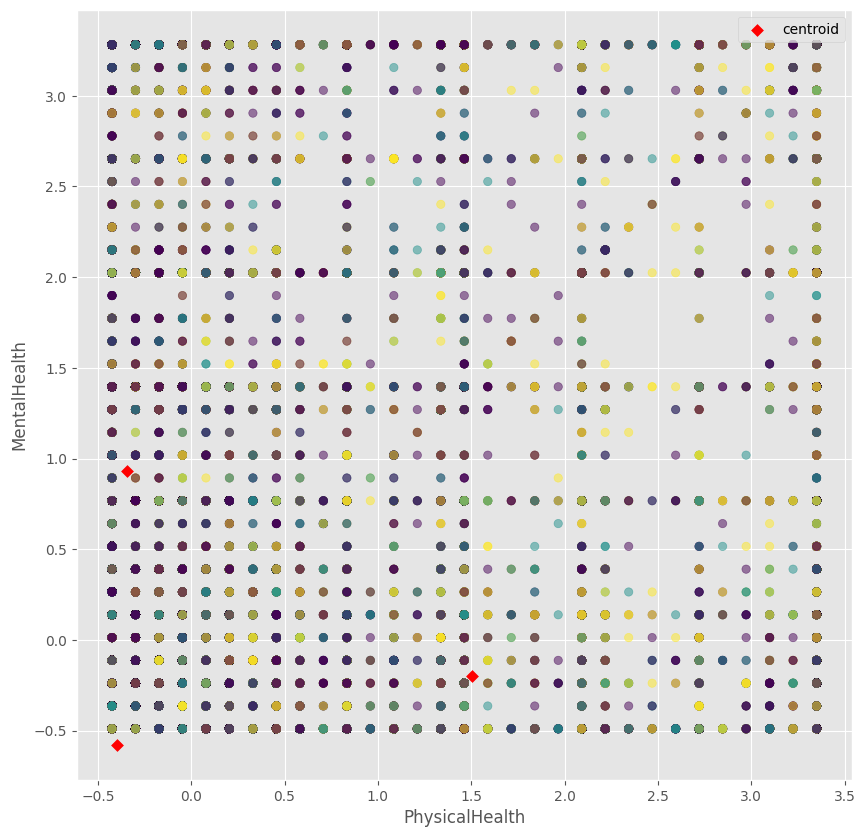

In [39]:
plt.style.use('ggplot') #buat background kotak"
plt.figure(figsize=(10, 10))
plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, c = 'red', marker = 'D', label = 'centroid')
plt.xlabel('PhysicalHealth')
plt.ylabel('MentalHealth')
plt.legend()
plt.show()